# Sekilas
Anak kosan itu hidupnya susah, jauh dari orang tua, jauh dari rumah, jauh dari ketenangan batin, uang pas-pasan belum lagi ada yang ngutang, makan gak teratur, udah gak teratur makanannya gak sehat lagi, menu pamungkas anak kos itu mie instant + nasi satu piring, itu udah kenyang banget. Saya yakin semua anak kosan prihatin dengan kehidupan mereka yang tidak sehat ini, saya ingin membantu menyelesaikan masalah asupan gizi mereka dengan uang pas-pasan ala anak kos tapi bisa memenuhi kebutuhan gizi dan vitamin tubuh mereka selama menunggu gajian selanjutnya dari orang tua.

# Masalah
Nutrisi yang ingin dioptimalkan adalah protein dan magnesium, protein dibutuhkan untuk pertumbuhan, asupan nutrisi dan perkembangan otak dan magnesium dibutuhkan tubuh untuk menjaga metabolisme sel, detoksifikasi, produksi energi menjaga kesehatan jantung dan tulang. Diketahui bahwa protein yang dibutuhkan tubuh perhari adalah 1g/kg berat badan. Jika dirata-ratakan berat badan anak kos-kosan adalah 50kg berarti jumlah protein yang dibutuhkan tubuh perhari adalah 50g. Adapun jumlah magnesium yang dibutuhkan tubuh perhari adalah 400mg. Makanan yang terjangkau yang mengandung banyak protein dan magnesium adalah bayam dan tempe dengan tabel sebagai berikut:


|Makanan     |Protein     |Magnesium     |Harga       |
|:----------:|:----------:|:------------:|:----------:|
|Bayam       |14g/ikat    |248mg/ikat    |2500/ikat   |
|Tempe       |57g/bungkus |243mg/bungkus |2000/bungkus|
|**Batasan** |**>= 50g**  |**>= 400mg**  |**<= 15000**|

- Objective
  * (14 * x + 57 * y) + (248 * x + 243 * y)
- Decision Variables
  * bayam = x
  * temepe = y
  * x,y >= 0
- Constraints
  * 14 * x + 57 * y >= 50
  * 248 * x + 243 * y >= 400
  * 2500 * x + 2000 * y <= 15000
  

In [3]:
import solver
import pulp

bayam = 'bayam'
tempe = 'tempe'
problem_name = 'Optimasi Gizi Anak Kos'

# decision variables (variabel keputusan)
x = pulp.LpVariable(bayam, lowBound=0, cat='Integer')
y = pulp.LpVariable(tempe, lowBound=0, cat='Integer')

# objective / fungsi tujuan
max_protein = 14 * x + 57 * y
max_magnesium = 248 * x + 243 * y
maximize = max_protein + max_magnesium

# constrains / fungsi kendala
protein = ((14 * x + 57 * y) >= 50 ) # 14x+57y >= 50

magnesium = ((248 * x + 243 * y) >= 400) # 248x+243y >= 400

harga = ((2500 * x + 2000 * y) <= 15000) # 2500x+2000y <= 15000

# magics
solver = solver.Solver(problem_name, pulp.LpMaximize)  # init the solver with maximize solution
solver.tujuan(maximize)  # add objective/fungsi tujuan
solver.kendala(protein, magnesium, harga)  # add constraints/fungsi kendala
solver.hasil(x, y)  # print result if solved

Penyelesaian variabel bayam adalah 0.0
Penyelesaian variabel tempe adalah 7.0


In [5]:
# print max
max_protein = 14 * x.value() + 57 * y.value()
max_magnesium = 248 * x.value() + 243 * y.value()
print "Max protein yang didapat sehari adalah {}g dari total minimal yang dibutuhkan (50g)".format(max_protein)
print "Max magnesium yang didapat sehari adalah {}mg dari total minimal yang dibutuhkan (400mg)".format(max_magnesium)
print "Dengan pengeluaran perhari {} dari 15000 jatah belanja perhari".format(2500 * x.value() + 2000 * y.value())

Max protein yang didapat sehari adalah 399.0g dari total minimal yang dibutuhkan (50g)
Max magnesium yang didapat sehari adalah 1701.0mg dari total minimal yang dibutuhkan (400mg)
Dengan pengeluaran perhari 14000.0 dari 15000 jatah belanja perhari


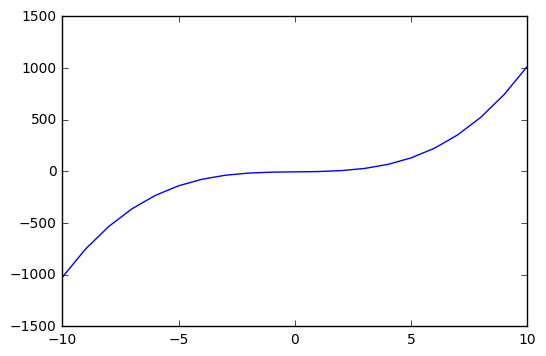

In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()
    
graph('x**3+2*x-4', range(-10, 11))